Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text. LSTM networks are capable of learning long-term dependencies in sequential data, which makes them well suited for tasks such as language translation, speech recognition, and time series forecasting.A traditional RNN has a single hidden state that is passed through time, which can make it difficult for the network to learn long-term dependencies. LSTMs address this problem by introducing a memory cell, which is a container that can hold information for an extended period of time. The memory cell is controlled by three gates: the input gate, the forget gate, and the output gate. These gates decide what information to add to, remove from, and output from the memory cell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv("Downloads/AXISBANK.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


In [3]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [4]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [5]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [6]:
data = df['Close'].values.reshape(-1, 1)

In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
lookback = 60

In [8]:
X, y = [], []
for i in range(len(data) - lookback):
    X.append(data[i:i + lookback])
    y.append(data[i + lookback])

X, y = np.array(X), np.array(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
66/66 [==============================] - 10s 100ms/step - loss: 0.0145
Epoch 2/50
66/66 [==============================] - 6s 92ms/step - loss: 0.0013
Epoch 3/50
66/66 [==============================] - 6s 96ms/step - loss: 0.0012
Epoch 4/50
66/66 [==============================] - 7s 101ms/step - loss: 0.0011
Epoch 5/50
66/66 [==============================] - 6s 93ms/step - loss: 9.8400e-04
Epoch 6/50
66/66 [==============================] - 5s 80ms/step - loss: 9.7722e-04
Epoch 7/50
66/66 [==============================] - 7s 100ms/step - loss: 9.2431e-04
Epoch 8/50
66/66 [==============================] - 6s 92ms/step - loss: 7.9502e-04
Epoch 9/50
66/66 [==============================] - 5s 80ms/step - loss: 7.7402e-04
Epoch 10/50
66/66 [==============================] - 6s 93ms/step - loss: 8.1146e-04
Epoch 11/50
66/66 [==============================] - 6s 96ms/step - loss: 6.4722e-04
Epoch 12/50
66/66 [==============================] - 7s 99ms/step - loss: 6.8145e-04
E

In [13]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

33/33 [==============================] - 1s 12ms/step


In [14]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 10.688631661551337
Mean Squared Error: 232.78682500119328
Root Mean Squared Error: 15.257353145326134


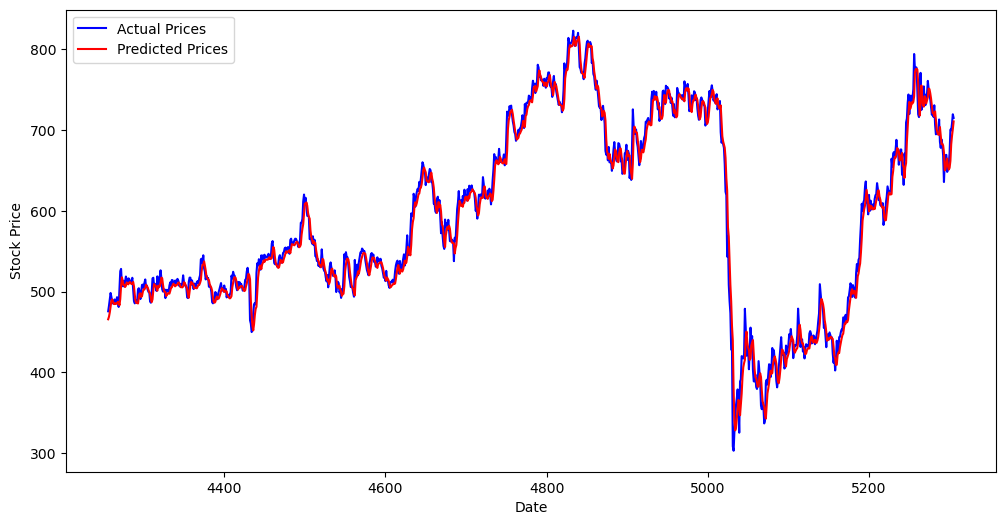

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()